In [151]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from numpy.linalg import norm
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

1. Problem statement. Describe the dataset, analyze the target variable, and state your prediction goal.

In this dataset, it shows how to find the bmi of a person based off of their gender, height, and weight. The target variable is 'Index' which identifies how weak or overweight a person is. The goal of this dataset is to figure out how to classify a male and female based off of their height and weight and to see if gender affects the outcome.

Index :
0 - Extremely Weak,
1 - Weak,
2 - Normal,
3 - Overweight,
4 - Obesity,
5 - Extreme Obesity

In [152]:
df = pd.read_csv('bmi.csv')
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [153]:
df['Index'].value_counts()

5    198
4    130
2     69
3     68
1     22
0     13
Name: Index, dtype: int64

2. Basic data cleaning.  Drop unwanted features.  Address missing values.  Remove Duplicates. Check if there are any inconsistent inputs for categorical variables. Transform categorical variables into numeric. Use boxplots or histogram to identify outliers for numeric variables and remove them.

In [154]:
df.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [155]:
dff = df.replace(['Male', 'Female'], [0,1])
dff

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3
...,...,...,...,...
495,1,150,153,5
496,1,184,121,4
497,1,141,136,5
498,0,150,95,5


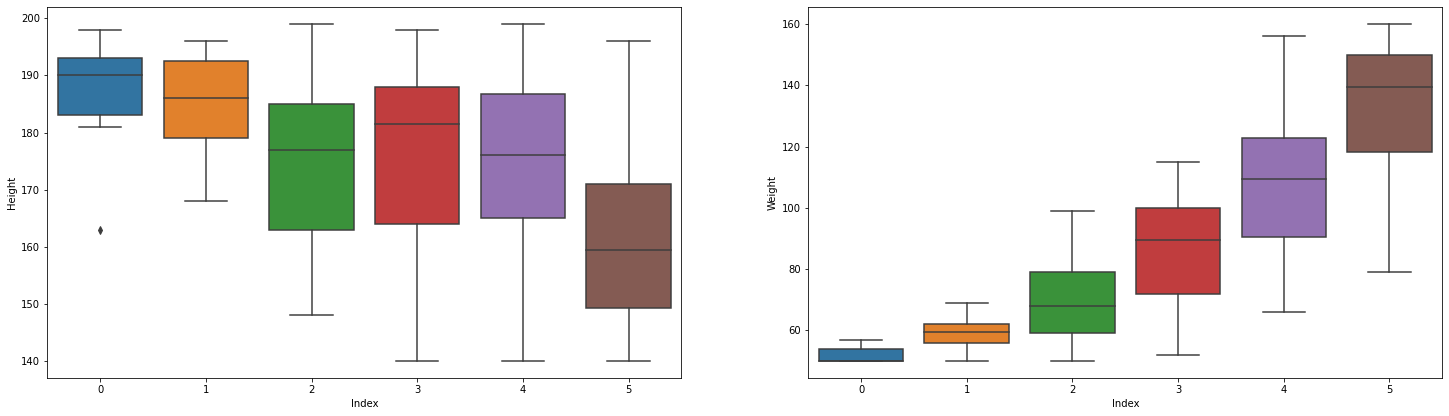

In [156]:
num_list=['Height', 'Weight']
fig=plt.figure(figsize=(25, 15))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(2,2,i+1)
    sns.boxplot(x='Index',y=column, data=dff)

3. Feature Engineering.
Feature selection. Use graphs, ANOVA test, Chi-squared test to reduce the dimension. Any variables with zero to little variance?  Any features Irrelevant to the target variable? Any high-correlated Features?  


Any variables with zero to little variance?
Height shows signs of having a much lower variance than weight. Height is more closer together, where as, weight is spread further apart.

Any features Irrelevant to the target variable? There are no features that are irrelevant to the target variable. They both show different values.

Any high-correlated Features?
No feature has a high correlation

In [157]:
#Anova Test
x = dff.loc[:, ['Height', 'Weight']]
y = dff.loc[:, 'Index']

fs = SelectKBest(score_func=f_classif, k='all')  
bestFeatures = fs.fit(x, y)   
np.set_printoptions(suppress = True)
print(bestFeatures.scores_)   
print(bestFeatures.pvalues_)

[ 29.23285766 197.21774469]
[0. 0.]


In [158]:
#Chi-squared Test for Categorical
x1 = dff.loc[:, ['Gender']]
y1 = dff.loc[:, 'Index']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x1, y1)
print(catFeatures.scores_)
print(catFeatures.pvalues_)

[3.58115123]
[0.61114556]


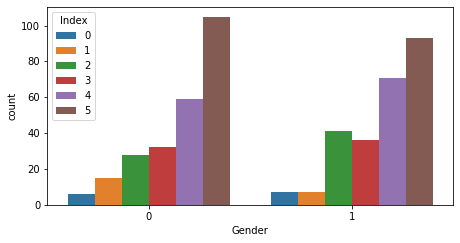

In [159]:
cat_list=['Gender']

fig=plt.figure(figsize=(16,8))
for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(2,2,i+1)
    chart=sns.countplot(x=column, hue='Index', data=dff)

In [160]:
#Coefficient
dff.corr()

,Gender,Height,Weight,Index
Gender,1.000000,0.017677,-0.009523,-0.028786
Height,0.017677,1.000000,0.000446,-0.422223
Weight,-0.009523,0.000446,1.000000,0.804569
Index,-0.028786,-0.422223,0.804569,1.000000


Feature scaling. Does this algorithm require normalized data or standardized data? It requires Normalized Data


In [161]:
x_final = df.loc[:, ['Height', 'Weight']]
from sklearn.preprocessing import MinMaxScaler
nor_x= MinMaxScaler()    
x_scaled= nor_x.fit_transform(x_final)    

In [162]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)  
oversampled_x,oversampled_y=os.fit_sample(x_scaled, y)

print(x_scaled.shape)
print(oversampled_x.shape)

(500, 2)
(1188, 2)


Are there any categorical variables need to be changed to dummy variables? No.


4. Build the prediction model.


Does this data need to be balanced?
Yes, it is very imbalanced. There are two different metrics being used, Centimeters and Pounds.

Do you use train_test_split or cross validation to validate the result? For this dataset, cross validation will be used

In [163]:
k_values = [] 
for i in range(1, 30):
    if i%5 !=0:   
        k_values.append(i)
print(k_values)

[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29]


In [164]:
k_accuracy_scores = [] 

for k in k_values:   
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores=cross_val_score(knn, x_scaled, y, cv=10, scoring='accuracy')
    k_accuracy_scores.append(cv_scores.mean()) 

df_k_scores = pd.DataFrame(data = np.c_[k_values, k_accuracy_scores], columns = ['k', 'accuracy']) 

print(df_k_scores)

       k  accuracy
0    1.0     0.890
1    2.0     0.864
2    3.0     0.892
3    4.0     0.898
4    6.0     0.884
5    7.0     0.888
6    8.0     0.876
7    9.0     0.878
8   11.0     0.876
9   12.0     0.878
10  13.0     0.878
11  14.0     0.878
12  16.0     0.868
13  17.0     0.866
14  18.0     0.858
15  19.0     0.862
16  21.0     0.858
17  22.0     0.858
18  23.0     0.850
19  24.0     0.840
20  26.0     0.824
21  27.0     0.828
22  28.0     0.818
23  29.0     0.816


Which algorithm is appropriate for this problem?

The KNN algorithm is the most appropriate for this since it tests for the nearness of the values. The results show a high accuracy.

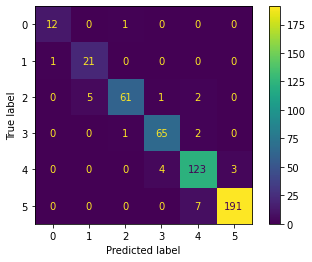

In [165]:
from sklearn.metrics import ConfusionMatrixDisplay
NN = KNeighborsClassifier(n_neighbors=4)
NN.fit(x_scaled, y) 
ConfusionMatrixDisplay.from_estimator(NN, x_scaled, y)

Which metrics do you use to evaluate the prediction model?

The metric I used was precision. It shows how accurate the model is out of the predicted positive and how many of them are actual positive.